**Import library need by the project**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


**Read data from CSV file and display the summary**

In [6]:
houses = pd.read_csv('./data/house_data.csv', sep=',')

houses.head(10)

,PROPERTY TYPE,ADDRESS,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET
0,Condo/Co-op,Plan 6 Plan,Sunnyvale,94089,1804990,3,3.5,Sunnyvale,1844.0
1,Condo/Co-op,188 W Saint James St #11004,San Jose,95110,890000,2,2.0,SAN JOSE,1135.0
2,Other,746 Tunitas Creek Rd,Half Moon Bay,94019,3436400,3,2.0,HALF MOON BAY,1608.0
3,Single Family Residential,3886 Ross Rd,Palo Alto,94303,6188000,5,5.5,PALO ALTO,3669.0
4,Multi-Family (5+ Unit),160 N Claremont St,San Mateo,94401,1900000,9,5.0,SAN MATEO,4145.0
5,Condo/Co-op,200 Brannan St #407,San Francisco,94107,1349000,2,2.0,SF District 9,1525.0
6,Condo/Co-op,38228 Paseo Padre Pkwy #24,Fremont,94536,599000,2,2.0,FREMONT,933.0
7,Townhouse,92 Ryland Park Way,San Jose,95110,1128000,3,2.5,CENTRAL SAN JOSE,1512.0
8,Condo/Co-op,520 Chestnut St #301,San Francisco,94133,859000,1,1.0,SF District 8,868.0
9,Condo/Co-op,2040 Franklin St #1209,San Francisco,94109,1395000,2,2.0,SF District 7,1177.0


In [7]:
houses.describe()

,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET
count,1378.000000,1.378000e+03,1378.000000,1378.000000,1373.000000
mean,94527.742380,1.629686e+06,3.079826,2.429608,1751.128186
std,437.902294,1.786266e+06,2.170178,1.736902,1330.432046
min,94010.000000,3.000000e+03,0.000000,1.000000,255.000000
25%,94108.000000,7.712500e+05,2.000000,2.000000,1077.000000
50%,94403.000000,1.289440e+06,3.000000,2.000000,1451.000000
75%,95051.000000,1.835500e+06,4.000000,3.000000,1972.000000
max,95148.000000,2.988000e+07,46.000000,46.000000,29358.000000


**The dataset provides multiple columns, we need to evaluate data type to help us to make decision what we are interested in**

In [8]:
obj = (houses.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (houses.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (houses.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 3
Float variables: 2


**Heatmap to help us to understand correlation. From here, we can understand price is probably related to square feet**

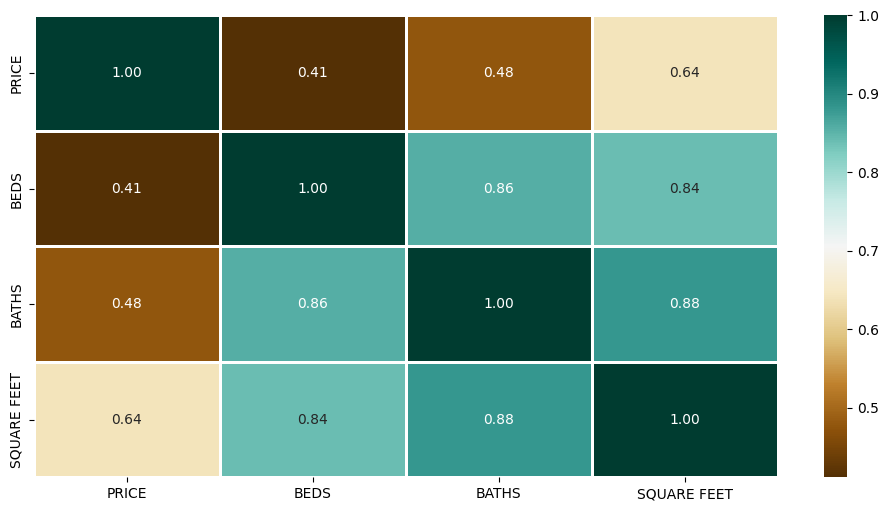

In [9]:
houses_numerical_dataset = houses.select_dtypes(include=['number'])
houses_numerical_dataset = houses_numerical_dataset.drop(columns=['ZIP OR POSTAL CODE'], errors='ignore')

plt.figure(figsize=(12, 6))
sns.heatmap(houses_numerical_dataset.corr(), cmap = 'BrBG', fmt = '.2f', linewidths = 2, annot = True)
plt.show()

**We create bar charts to analyze categorical variables. Dataset has four categorical variables but it seems like property type and city are useful.**

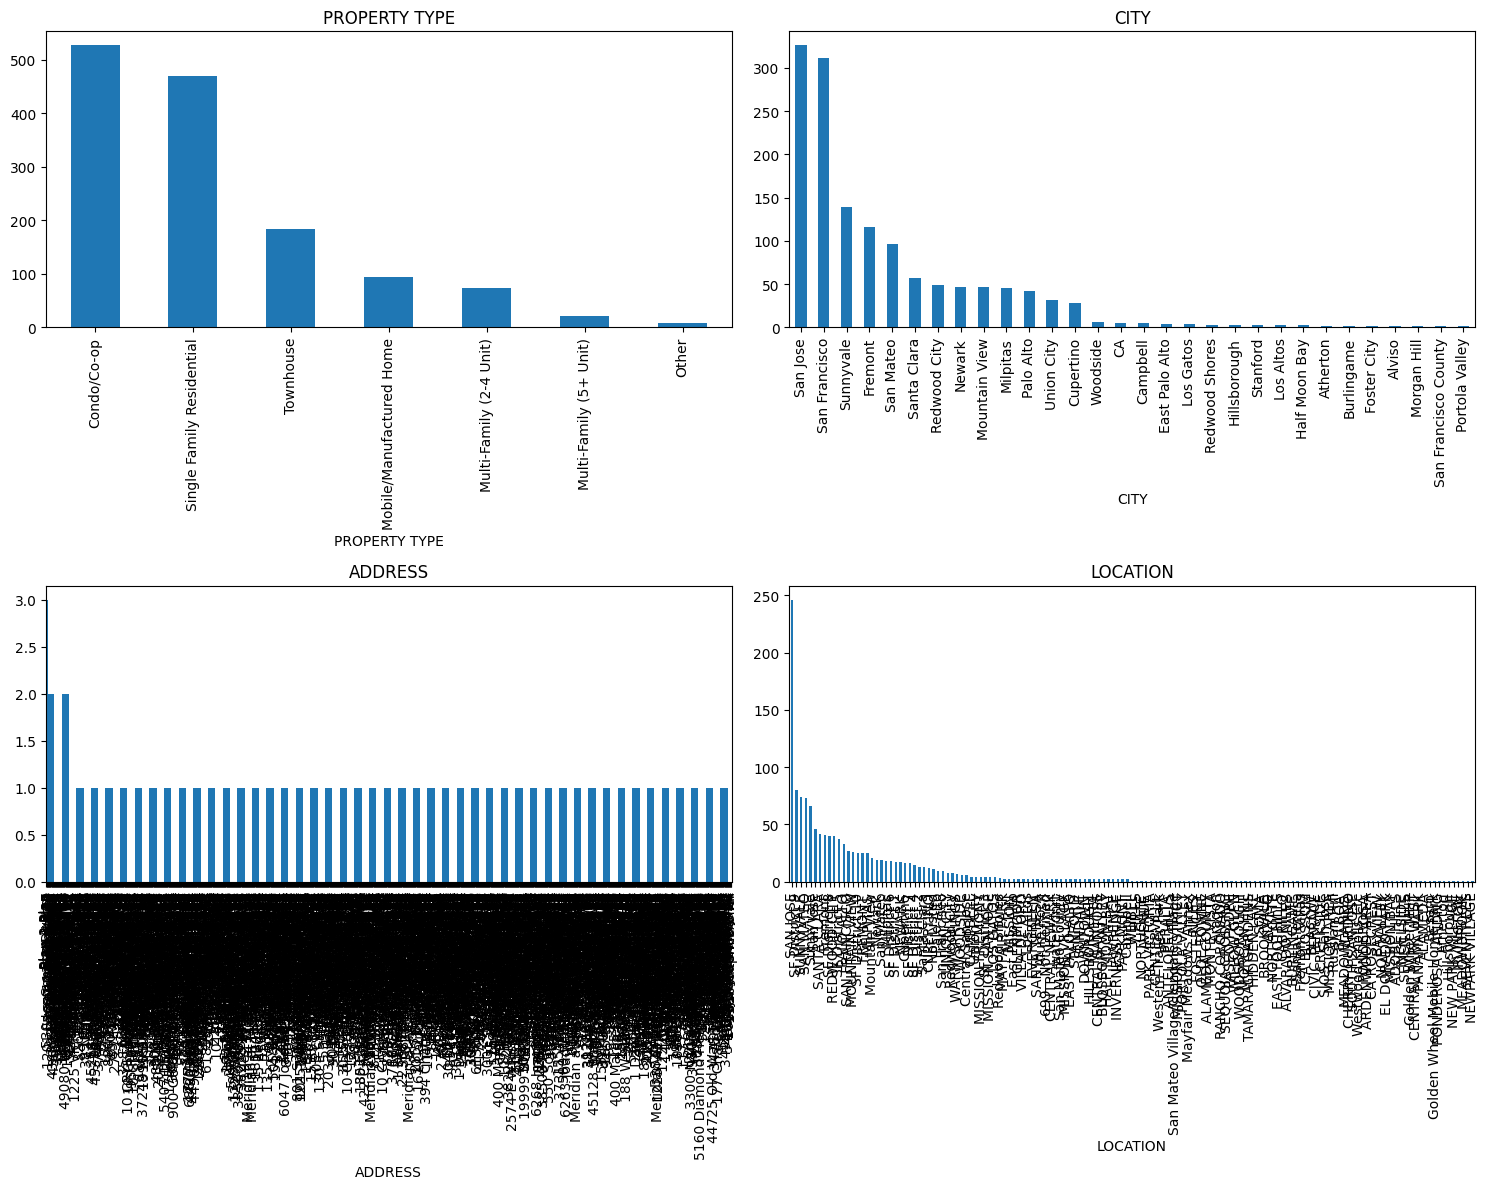

In [39]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 12))

houses['PROPERTY TYPE'].value_counts().plot(ax = ax1, kind='bar', title = 'PROPERTY TYPE') 
houses['CITY'].value_counts().plot(ax = ax2, kind='bar', title = 'CITY') 
houses['ADDRESS'].value_counts().plot(ax = ax3, kind='bar', title = 'ADDRESS') 
houses['LOCATION'].value_counts().plot(ax = ax4, kind='bar', title = 'LOCATION') 

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**According to the above bar charts, we group price by city and property type to get mean**

In [40]:
price_by_city = houses.groupby('CITY')['PRICE'].mean().astype('int64')
print(price_by_city)

print("\n\n")

price_by_property_type = houses.groupby('PROPERTY TYPE')['PRICE'].mean().astype('int64')
print(price_by_property_type)

print("\n\n")

CITY
Alviso                  1150000
Atherton                5580000
Burlingame              3999999
CA                       332919
Campbell                1419937
Cupertino               3503977
East Palo Alto          1144750
Foster City              849000
Fremont                 1323977
Half Moon Bay           3305700
Hillsborough            9088000
Los Altos                815000
Los Gatos               3118250
Milpitas                1896933
Morgan Hill              399000
Mountain View           1716196
Newark                  1108362
Palo Alto               5590304
Portola Valley          5988000
Redwood City            1916009
Redwood Shores          2560600
San Francisco           1594846
San Francisco County     930000
San Jose                1229783
San Mateo               1330528
Santa Clara             1144587
Stanford                1974000
Sunnyvale               1334721
Union City              1278714
Woodside                6455500
Name: PRICE, dtype: int64



PROPER

**Plot scatter to show the correlation of city and price, property type and price**

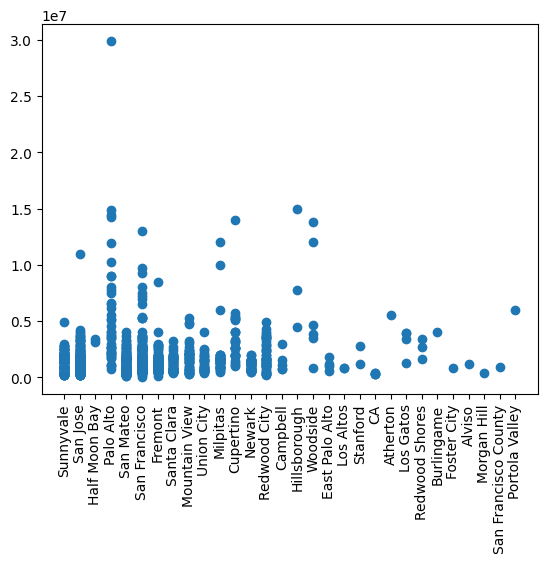

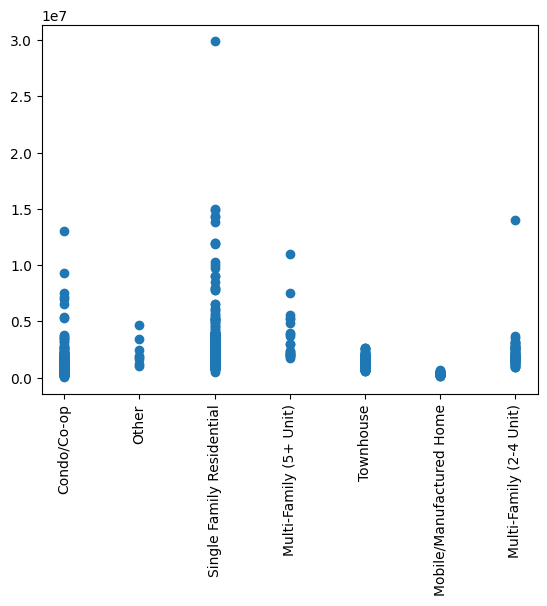

In [41]:
def plot_scatter(col_name):
    plt.scatter(houses[col_name], houses['PRICE'])
    plt.xticks(rotation=90)
    plt.show()

plot_scatter('CITY')
plot_scatter('PROPERTY TYPE')

`We dropped some columns because those are not useful.`

In [7]:
cleanup_houses = houses.drop(columns=['ZIP OR POSTAL CODE', 'LOCATION', 'ADDRESS'], errors='ignore')
print(cleanup_houses.head(10))

               PROPERTY TYPE           CITY    PRICE  BEDS  BATHS  SQUARE FEET
0                Condo/Co-op      Sunnyvale  1804990     3    3.5       1844.0
1                Condo/Co-op       San Jose   890000     2    2.0       1135.0
2                      Other  Half Moon Bay  3436400     3    2.0       1608.0
3  Single Family Residential      Palo Alto  6188000     5    5.5       3669.0
4     Multi-Family (5+ Unit)      San Mateo  1900000     9    5.0       4145.0
5                Condo/Co-op  San Francisco  1349000     2    2.0       1525.0
6                Condo/Co-op        Fremont   599000     2    2.0        933.0
7                  Townhouse       San Jose  1128000     3    2.5       1512.0
8                Condo/Co-op  San Francisco   859000     1    1.0        868.0
9                Condo/Co-op  San Francisco  1395000     2    2.0       1177.0


Splitting data to Training & Test

In [20]:
# Splitting the dataset into 80% training and 20% testing
train_set, test_set = train_test_split(cleanup_houses, test_size=0.2, random_state=42)

# Checking the split
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")

Training set size: 1102
Test set size: 276
